### Thinking1：什么是Graph Embedding，都有哪些算法模型？
### answer：1、Graph Embedding是一种Embedding降维技术，可以有效的挖掘图网络中的节点特征表示。2、算法模型有Deepwalk，Node2vec等。

### Thinking2:如何使用Graph Embedding在推荐系统，比如NetFlix 电影推荐，请说明简要的思路
### answer：首先获取一段时间内包含用户（users）和历史观看电影（movies）的数据集。接下来，1、建模：将所有user在一段时间内的历史观看电影构建为一个图；2、提取特征：通过RandomWalk生成模型训练需要的训练数据；3、模型训练：通过Word2Vec模型来构建每个节点(movie)的Embedding向量。4、代码实现（进行预测）。

### Thinking3:数据探索EDA都有哪些常用的方法和工具？
### answer：如缺失值的可视化处理（missingno），一行代码生成数据概览报告（pandas_profiling）。

In [5]:
#pip install node2vec

Computing transition probabilities:  41%|████▏     | 994/2399 [00:00<00:00, 3239.44it/s]

<class 'networkx.classes.graph.Graph'>
2399


Generating walks (CPU: 1): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]


[('total permanent disability insurance', 0.9907325506210327), ("servicemembers' group life insurance", 0.8133966326713562), ('rand health insurance experiment', 0.7894190549850464), ('health care reform debate in the united states', 0.785392701625824), ('return of premium life insurance', 0.7833007574081421), ('tontine', 0.7811092734336853), ('health insurance in the united states', 0.7730342149734497), ('medicaid estate recovery', 0.7663220167160034), ('the hospital uninsured patient discount act (illinois)', 0.7654306292533875), ('patient protection and affordable care act', 0.7565757036209106)]


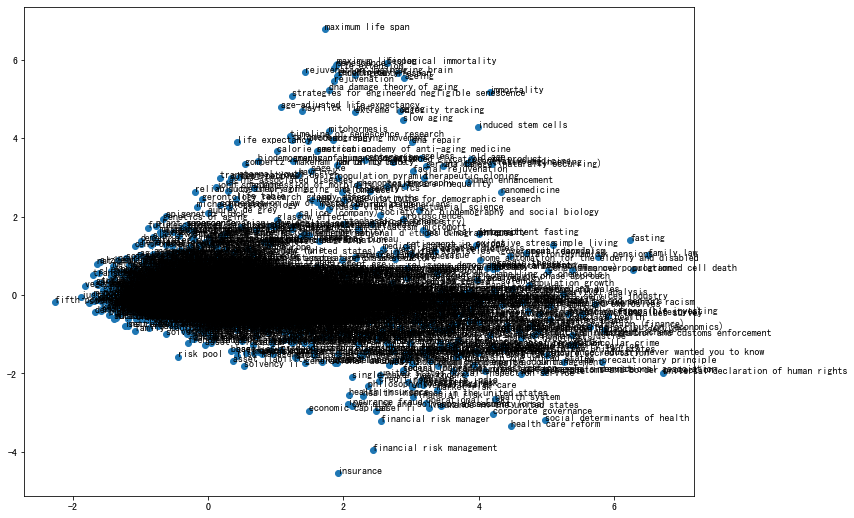

In [4]:
#Action 1
# 使用Node2Vec对space_data进行压缩
import networkx as nx
#Action 1
import random
from tqdm import tqdm
from sklearn.decomposition import PCA
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 数据加载，构造图
df = pd.read_csv('seealsology-data.tsv', sep='\t')
G = nx.from_pandas_edgelist(df, 'source', 'target', edge_attr=True, create_using=nx.Graph())
print(type(G))
print(len(G))

# 初始化Node2Vec模型
#model = DeepWalk(G, walk_length=10, num_walks=5, workers=1)
model = Node2Vec(G, walk_length = 10, num_walks = 5, p = 0.25, q = 4, workers = 1)
# 模型训练
result = model.fit(window=4, iter=20)
# 得到节点的embedding
print(result.wv.most_similar('critical illness insurance'))
embeddings = result.wv
print(embeddings)

# 在二维空间中绘制所选节点的向量
def plot_nodes(word_list):
    # 每个节点的embedding为100维
    X = []
    for item in word_list:
        X.append(embeddings[item])
    #print(X.shape)
    # 将100维向量减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X) 
    #print(result)
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(list(word_list)):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))        
    plt.show()
    
plot_nodes(result.wv.vocab)
